In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVR

# Read data
df = pd.read_csv('ICICIBANK.csv')

# Read NIFTY50 data
nifty_df = pd.read_csv('BANKNIFTY.csv')

# Assuming both datasets have Date and Close columns, adjust if needed
# Merge the ICICIBANK and NIFTY50 dataframes based on the 'Date' column
merged_df = pd.merge(df, nifty_df[['Date', 'Close']], on='Date', how='inner')
merged_df.rename(columns={'Close_x': 'ICICIBANK_Close', 'Close_y': 'BANKNIFTY_Close'}, inplace=True)


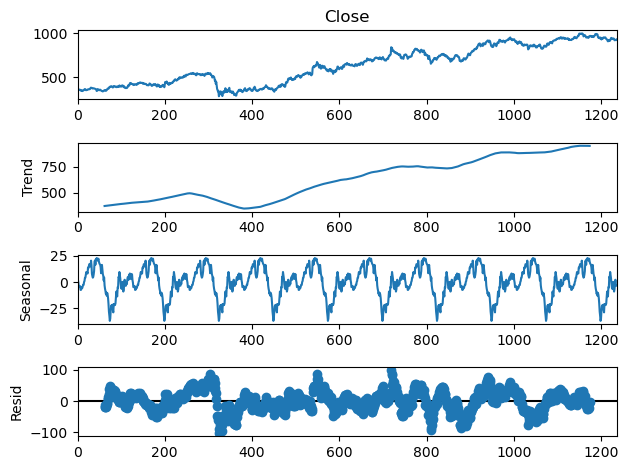

In [2]:
# Seasonal decompose 
from statsmodels.tsa.seasonal import seasonal_decompose
icici_result = seasonal_decompose(df['Close'], model='additive', period=125)
icici_result.plot();

In [3]:
# Fit auto_arima function to Closing price of dataset
stepwise_fit = auto_arima(merged_df['ICICIBANK_Close'], exogenous=merged_df[['BANKNIFTY_Close']],
                          start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

selected_aic = stepwise_fit.aic()
print(f"Selected AIC: {selected_aic}")


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=10.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10100.875, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9776.979, Time=0.79 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.75 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10102.139, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9640.733, Time=1.72 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=24.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9638.817, Time=1.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=9774.979, Time=0.58 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=13.37 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.44 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9640.729, Time=1.86 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=9642.320, Time=4.51 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=9

In [4]:
# Fit auto_arima function to Closing price of dataset
stepwise_fit = auto_arima(merged_df['ICICIBANK_Close'], exogenous=merged_df[['BANKNIFTY_Close']],
                          start_p=0, start_q=0, max_p=3, max_q=3, m=20,
                          start_P=0, seasonal=True, d=1, D=2, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

selected_aic = stepwise_fit.aic()
print(f"Selected AIC: {selected_aic}")


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,2,1)[20]             : AIC=inf, Time=13.68 sec
 ARIMA(0,1,0)(0,2,0)[20]             : AIC=11236.172, Time=0.46 sec
 ARIMA(1,1,0)(1,2,0)[20]             : AIC=10515.874, Time=2.98 sec
 ARIMA(0,1,1)(0,2,1)[20]             : AIC=inf, Time=29.68 sec
 ARIMA(1,1,0)(0,2,0)[20]             : AIC=11237.771, Time=1.25 sec
 ARIMA(1,1,0)(2,2,0)[20]             : AIC=10217.209, Time=14.40 sec
 ARIMA(1,1,0)(2,2,1)[20]             : AIC=inf, Time=162.04 sec
 ARIMA(1,1,0)(1,2,1)[20]             : AIC=inf, Time=51.94 sec
 ARIMA(0,1,0)(2,2,0)[20]             : AIC=10215.223, Time=9.21 sec
 ARIMA(0,1,0)(1,2,0)[20]             : AIC=10514.051, Time=2.46 sec
 ARIMA(0,1,0)(2,2,1)[20]             : AIC=inf, Time=94.20 sec
 ARIMA(0,1,0)(1,2,1)[20]             : AIC=inf, Time=25.50 sec
 ARIMA(0,1,1)(2,2,0)[20]             : AIC=10217.209, Time=11.14 sec
 ARIMA(1,1,1)(2,2,0)[20]             : AIC=10219.209, Time=15.99 sec
 ARIMA(0,1,0)(2,2,0)[20] interc

In [5]:
# To print the summary
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1237
Model:             SARIMAX(0, 1, 0)x(2, 2, 0, 20)   Log Likelihood               -5104.612
Date:                            Tue, 02 Jan 2024   AIC                          10215.223
Time:                                    20:14:36   BIC                          10230.484
Sample:                                         0   HQIC                         10220.973
                                           - 1237                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20      -0.9927      0.019    -51.032      0.000      -1.031      -0.955
ar.S.L40      -0.4709      0.024    -19.695      0.000      -0.518      -0.424
sigma2       292.8701      8.950     32.722      0.000     275.328     310.412
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               147.85
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.10
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# Handle missing or infinite values in the merged dataframe
merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna()

# Split data into train / test sets
split_percentage = 0.8  # Set the percentage for training data
split = int(split_percentage * len(merged_df))  # Calculate the split index

# Extract training data (first 80% of the data)
train = merged_df.iloc[:split]

# Extract test data (remaining 20% of the data)
test = merged_df.iloc[split:]

# Fit a SARIMAX(2, 0, 3)x(2, 1, 0, 20) on the training set
model = SARIMAX(endog=train['ICICIBANK_Close'], exog=train[['BANKNIFTY_Close']],
                order=(1, 0,1 ),  # Non-seasonal order (p, d, q)
                seasonal_order=(2, 0, 1, 12)  # Seasonal order (P, D, Q, m)
                )

# Fit the SARIMAX model to the training data
result = model.fit()

# Print the summary of the fitted model
result.summary()

C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    ICICIBANK_Close   No. Observations:                  984
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 12)   Log Likelihood               -3074.110
Date:                            Tue, 02 Jan 2024   AIC                           6162.221
Time:                                    20:14:51   BIC                           6196.462
Sample:                                         0   HQIC                          6175.245
                                            - 984                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
BANKNIFTY_Close     0.0195      0.000     70.460      0.000       0.019       0.020
ar.L1               0.9989      0.002    639.101      0.000       0.996       1.002
ma.L1              -0.0851      0.028     -3.068      0.002      -0.140      -0.031
ar.S.L12            0.9707      0.058     16.845      0.000       0.858       1.084
ar.S.L24            0.0153      0.037      0.410      0.682      -0.058       0.088
ma.S.L12           -0.9922      0.048    -20.510      0.000      -1.087      -0.897
sigma2             30.1185      0.596     50.569      0.000      28.951      31.286
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17140.42
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Calculating the start and end indices for the test set
start = len(train)  # The starting index of the test set
end = len(train) + len(test) - 1  # The ending index of the test set

# Making predictions using the SARIMAX model
# The 'exog' parameter is used to provide exogenous variables for forecasting
predictions = result.predict(start, end, exog=test[['BANKNIFTY_Close']],
                             typ='levels').rename("Predictions")


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test' dataframe and 'predictions' series are available

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['ICICIBANK_Close'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ICICIBANK_Close'], predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 19.061077282807762
Mean Squared Error (MSE): 567.9420087569034
Root Mean Squared Error (RMSE): 23.831533915316978


C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [8]:
model = SARIMAX(endog=train['ICICIBANK_Close'], exog=train[['BANKNIFTY_Close']],
                order=(2, 1,1 ),  # Non-seasonal order (p, d, q)
                seasonal_order=(2, 1, 2, 20)  # Seasonal order (P, D, Q, m)
                )

# Fit the SARIMAX model to the training data
result = model.fit()

# Print the summary of the fitted model
result.summary()

C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\base\model.py:604: C

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                         ICICIBANK_Close   No. Observations:                  984
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 20)   Log Likelihood               -3046.434
Date:                                 Tue, 02 Jan 2024   AIC                           6110.867
Time:                                         20:17:06   BIC                           6154.698
Sample:                                              0   HQIC                          6127.556
                                                 - 984                                         
Covariance Type:                                   opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
BANKNIFTY_Close     0.0196      0.000     67.845      0.000       0.019       0.020
ar.L1              -0.0293      1.946     -0.015      0.988      -3.843       3.784
ar.L2              -0.0092      0.188     -0.049      0.961      -0.377       0.359
ma.L1              -0.0671      1.945     -0.034      0.972      -3.879       3.745
ar.S.L20           -0.7725      0.418     -1.847      0.065      -1.592       0.047
ar.S.L40           -0.0087      0.040     -0.217      0.829      -0.088       0.070
ma.S.L20           -0.1895      0.418     -0.453      0.650      -1.009       0.630
ma.S.L40           -0.7721      0.407     -1.895      0.058      -1.571       0.026
sigma2             30.6821      0.555     55.304      0.000      29.595      31.769
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12236.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Calculating the start and end indices for the test set
start = len(train)  # The starting index of the test set
end = len(train) + len(test) - 1  # The ending index of the test set

# Making predictions using the SARIMAX model
# The 'exog' parameter is used to provide exogenous variables for forecasting
predictions = result.predict(start, end, exog=test[['BANKNIFTY_Close']],
                             typ='levels').rename("Predictions")


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test' dataframe and 'predictions' series are available

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['ICICIBANK_Close'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ICICIBANK_Close'], predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 54.01877266066934
Mean Squared Error (MSE): 3198.7436380043723
Root Mean Squared Error (RMSE): 56.55743662865541


C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [10]:
model = SARIMAX(endog=train['ICICIBANK_Close'], exog=train[['BANKNIFTY_Close']],
                order=(1, 1,1 ),  # Non-seasonal order (p, d, q)
                seasonal_order=(1, 1, 1, 20)  # Seasonal order (P, D, Q, m)
                )

# Fit the SARIMAX model to the training data
result = model.fit()

# Print the summary of the fitted model
result.summary()

C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    ICICIBANK_Close   No. Observations:                  984
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 20)   Log Likelihood               -3046.479
Date:                            Tue, 02 Jan 2024   AIC                           6104.957
Time:                                    20:17:43   BIC                           6134.177
Sample:                                         0   HQIC                          6116.083
                                            - 984                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
BANKNIFTY_Close     0.0196      0.000     66.933      0.000       0.019       0.020
ar.L1              -0.6176      0.202     -3.059      0.002      -1.013      -0.222
ma.L1               0.5426      0.216      2.510      0.012       0.119       0.966
ar.S.L20            0.0189      0.035      0.535      0.593      -0.050       0.088
ma.S.L20           -0.9955      0.113     -8.791      0.000      -1.217      -0.774
sigma2             30.3752      2.891     10.506      0.000      24.708      36.042
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             12575.08
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# Calculating the start and end indices for the test set
start = len(train)  # The starting index of the test set
end = len(train) + len(test) - 1  # The ending index of the test set

# Making predictions using the SARIMAX model
# The 'exog' parameter is used to provide exogenous variables for forecasting
predictions = result.predict(start, end, exog=test[['BANKNIFTY_Close']],
                             typ='levels').rename("Predictions")


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test' dataframe and 'predictions' series are available

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['ICICIBANK_Close'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ICICIBANK_Close'], predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 53.011104550079345
Mean Squared Error (MSE): 3079.0143667716543
Root Mean Squared Error (RMSE): 55.48886705251473


C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
model = SARIMAX(endog=train['ICICIBANK_Close'], exog=train[['BANKNIFTY_Close']],
                order=(1, 0,0 ),  # Non-seasonal order (p, d, q)
                seasonal_order=(1, 0, 0, 12)  # Seasonal order (P, D, Q, m)
                )

# Fit the SARIMAX model to the training data
result = model.fit()

# Print the summary of the fitted model
result.summary()

C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    ICICIBANK_Close   No. Observations:                  984
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -3440.955
Date:                            Tue, 02 Jan 2024   AIC                           6889.909
Time:                                    20:17:46   BIC                           6909.476
Sample:                                         0   HQIC                          6897.352
                                            - 984                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
BANKNIFTY_Close     0.0195      0.000     58.061      0.000       0.019       0.020
ar.L1               0.9986      0.002    480.386      0.000       0.994       1.003
ar.S.L12            0.9860      0.008    120.729      0.000       0.970       1.002
sigma2             60.3743      1.286     46.930      0.000      57.853      62.896
===================================================================================
Ljung-Box (L1) (Q):                   8.13   Jarque-Bera (JB):              4869.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Calculating the start and end indices for the test set
start = len(train)  # The starting index of the test set
end = len(train) + len(test) - 1  # The ending index of the test set

# Making predictions using the SARIMAX model
# The 'exog' parameter is used to provide exogenous variables for forecasting
predictions = result.predict(start, end, exog=test[['BANKNIFTY_Close']],
                             typ='levels').rename("Predictions")


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test' dataframe and 'predictions' series are available

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['ICICIBANK_Close'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ICICIBANK_Close'], predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 44.958457264062694
Mean Squared Error (MSE): 2730.2990455175895
Root Mean Squared Error (RMSE): 52.25226354443977


C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
model = SARIMAX(endog=train['ICICIBANK_Close'], exog=train[['BANKNIFTY_Close']],
                order=(2, 0,0 ),  # Non-seasonal order (p, d, q)
                seasonal_order=(2, 0, 2,3 )  # Seasonal order (P, D, Q, m)
                )

# Fit the SARIMAX model to the training data
result = model.fit()

# Print the summary of the fitted model
result.summary()

C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                        ICICIBANK_Close   No. Observations:                  984
Model:             SARIMAX(2, 0, 0)x(2, 0, [1, 2], 3)   Log Likelihood               -3073.540
Date:                                Tue, 02 Jan 2024   AIC                           6163.080
Time:                                        20:17:50   BIC                           6202.213
Sample:                                             0   HQIC                          6177.965
                                                - 984                                         
Covariance Type:                                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
BANKNIFTY_Close     0.0195      0.000     68.965      0.000       0.019       0.020
ar.L1               0.9031      0.028     31.897      0.000       0.848       0.959
ar.L2               0.0956      0.028      3.372      0.001       0.040       0.151
ar.S.L3             0.0189      0.375      0.050      0.960      -0.716       0.754
ar.S.L6             0.9810      0.367      2.674      0.008       0.262       1.700
ma.S.L3            -0.0095      0.427     -0.022      0.982      -0.847       0.828
ma.S.L6            -0.9905      0.421     -2.353      0.019      -1.815      -0.166
sigma2             30.1887      1.910     15.807      0.000      26.446      33.932
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             16761.11
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Calculating the start and end indices for the test set
start = len(train)  # The starting index of the test set
end = len(train) + len(test) - 1  # The ending index of the test set

# Making predictions using the SARIMAX model
# The 'exog' parameter is used to provide exogenous variables for forecasting
predictions = result.predict(start, end, exog=test[['BANKNIFTY_Close']],
                             typ='levels').rename("Predictions")



C:\Users\LENOVO S145\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test' dataframe and 'predictions' series are available

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['ICICIBANK_Close'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ICICIBANK_Close'], predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 18.18330572364642
Mean Squared Error (MSE): 554.350500224604
Root Mean Squared Error (RMSE): 23.54464907839155


In [17]:
# Calculate Percentage Mean Absolute Error (MAPE)
mape = np.mean(np.abs((test['ICICIBANK_Close'] - predictions) / test['ICICIBANK_Close'])) * 100

# Calculate Percentage Root Mean Squared Error (PRMSE)
prmse = (rmse / np.mean(test['ICICIBANK_Close'])) * 100

print(f'Percentage Mean Absolute Error (MAPE): {mape:.2f}%')
print(f'Percentage Root Mean Squared Error (PRMSE): {prmse:.2f}%')


Percentage Mean Absolute Error (MAPE): 2.43%
Percentage Root Mean Squared Error (PRMSE): 2.56%


In [18]:
# Calculate the percentage accuracy
accuracy_percentage = 100 - (100 *(rmse / np.mean(test['ICICIBANK_Close'])))

# Print the accuracy percentage
print(f"SARIMAX Accuracy: {accuracy_percentage:.2f}%")


SARIMAX Accuracy: 97.44%


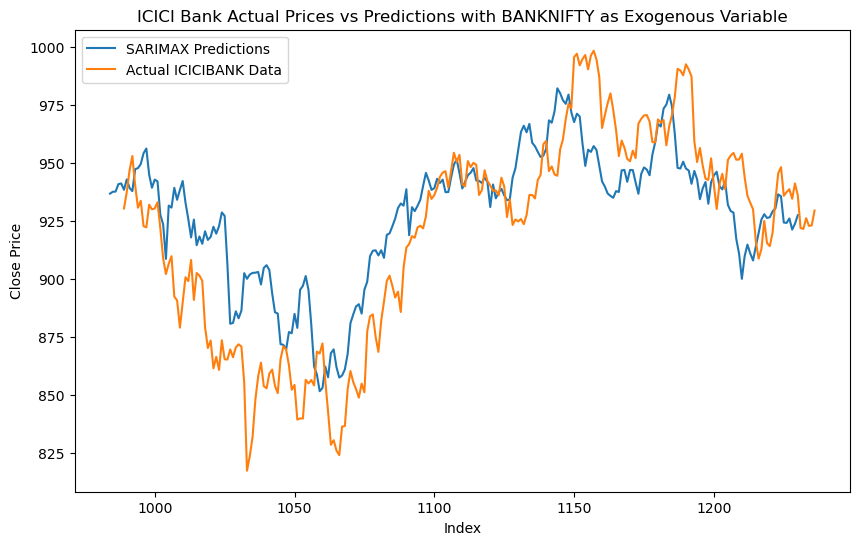

In [19]:
# Plotting actual data, predictions of SARIMA
plt.figure(figsize=(10, 6))
predictions.plot(legend=True, label='SARIMAX Predictions')
test['ICICIBANK_Close'].plot(legend=True, label='Actual ICICIBANK Data')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('ICICI Bank Actual Prices vs Predictions with BANKNIFTY as Exogenous Variable')
plt.legend()
plt.show()

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
# Load the data
data = pd.read_csv('ICICIBANK.csv')

# Explore data
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-26,354.750000,357.850006,350.700012,356.350006,349.452881,20673027
1,2018-11-27,355.750000,356.100006,351.600006,354.649994,347.785797,17933339
2,2018-11-28,356.950012,361.549988,353.250000,359.000000,352.051575,18163000
3,2018-11-29,363.000000,366.399994,360.200012,362.200012,355.189667,38692771
4,2018-11-30,365.000000,365.000000,353.799988,355.149994,348.276123,21893877


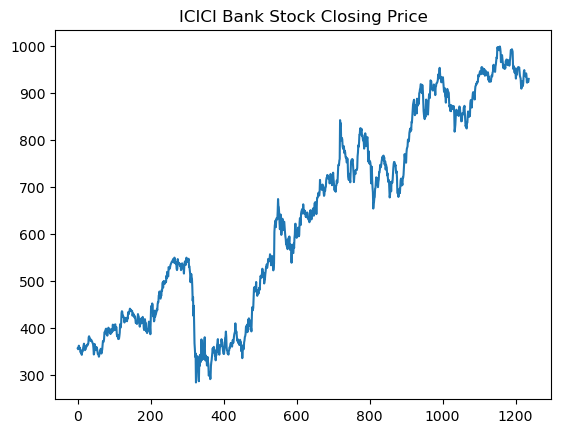

In [22]:
# Visualize the Closing price series
plt.plot(data['Close'])
plt.title('ICICI Bank Stock Closing Price')
plt.show()

In [23]:
 #Support Vector Regression (SVR)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from math import sqrt

# Rescale/normalize stock price data
scaler = StandardScaler() 
#Fit the scaler to the data and transform it. 
#This involves calculating the mean and standard deviation of the 'Close' prices and then applying the transformation to standardize the data.
scaled_data = scaler.fit_transform(data[['Close']]) 

In [24]:
# Split data into train and validate sets
train_size_svr = int(len(scaled_data) * 0.8)
train_svr, validate_svr = scaled_data[:train_size_svr], scaled_data[train_size_svr:]

# Prepare input features (X) and target variable (y) for SVR
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)
#len(data) represents the total number of data points in this sequence.
#seq_length represents the length of sequences you want to create for training the SVR model.
#The goal is to create input sequences (X) and their corresponding target variables (y) for training an SVR model.
seq_length = 10 
#seq_length is set to 10, meaning each input sequence (X) will consist of 10 consecutive data points,
#and the corresponding target variable (y) will be the data point following those 10.
X_train, y_train = create_sequences(train_svr, seq_length)
X_validate, y_validate = create_sequences(validate_svr, seq_length)

# Tune SVR parameters using cross-validation
# You may need to adjust these parameters based on your data and requirements
svr = SVR(kernel='linear', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)
#C (Cost) is the regularization parameter that influences the trade-off between having a smooth decision boundary and classifying the training points correctly.
#gamma is the The kernel coefficient. It controls the shape of the decision boundary. A smaller gamma will create a more complex decision boundary.
# Evaluate SVR model performance on validate set
predictions_svr = svr.predict(X_validate)

In [25]:
# Invert scaling to get predictions in original scale
predictions_svr_original = scaler.inverse_transform(predictions_svr.reshape(-1, 1))
#it's common to inverse transform the predictions to bring them back to the original scale of the data.

In [26]:
# Calculate RMSE(Root Mean Squared Error) for SVR predictions
mse_svr = mean_squared_error(scaler.inverse_transform(y_validate.reshape(-1, 1)), predictions_svr_original)
rmse_svr = sqrt(mse_svr)

# Print performance metrics
print("SVR RMSE:", rmse_svr)

SVR RMSE: 8.601939677514844


In [27]:
# Calculate the percentage accuracy
accuracy_percentage =(100 * (rmse_svr / np.mean(scaler.inverse_transform(y_validate.reshape(-1, 1)))))

# Print the accuracy percentage
print(f"SVR Percentage Root Mean Squared Error(PRMSE): {accuracy_percentage:.2f}%")


SVR Percentage Root Mean Squared Error(PRMSE): 0.94%


In [28]:
# Calculate the percentage accuracy
accuracy_percentage = 100 - (100 * (rmse_svr / np.mean(scaler.inverse_transform(y_validate.reshape(-1, 1)))))

# Print the accuracy percentage
print(f"SVR Accuracy: {accuracy_percentage:.2f}%")


SVR Accuracy: 99.06%


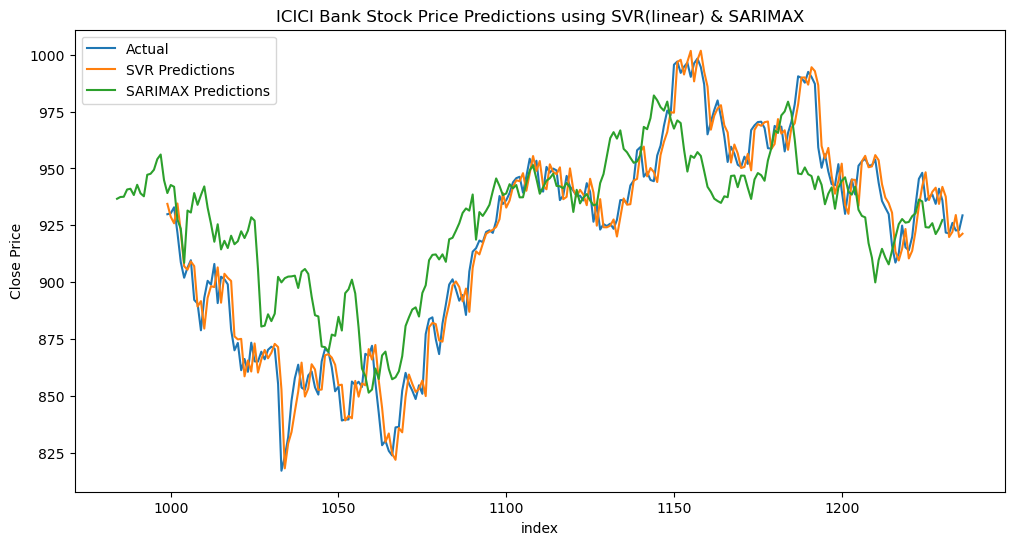

In [29]:
# Visualize SVR predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size_svr + seq_length:], scaler.inverse_transform(validate_svr[seq_length:]), label='Actual')
plt.plot(data.index[train_size_svr + seq_length:], predictions_svr_original, label='SVR Predictions')
predictions.plot(legend=True, label='SARIMAX Predictions') 
plt.title('ICICI Bank Stock Price Predictions using SVR(linear) & SARIMAX')
plt.xlabel('index')
plt.ylabel('Close Price')
plt.legend()
plt.show()